#### NOTE -  Given the fact my Group Project data comes from a Kaggle Competition Project with data available to use in Excel format already, I try to use Web Crawler techniques learned from Techlent course to obtain data from a Wikipedia Website - https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue

From the above site the data I want to extract is in a table of 100 largest public companies by revenue in 2023. There are 100 dataset and 7 columns as figure shown below.
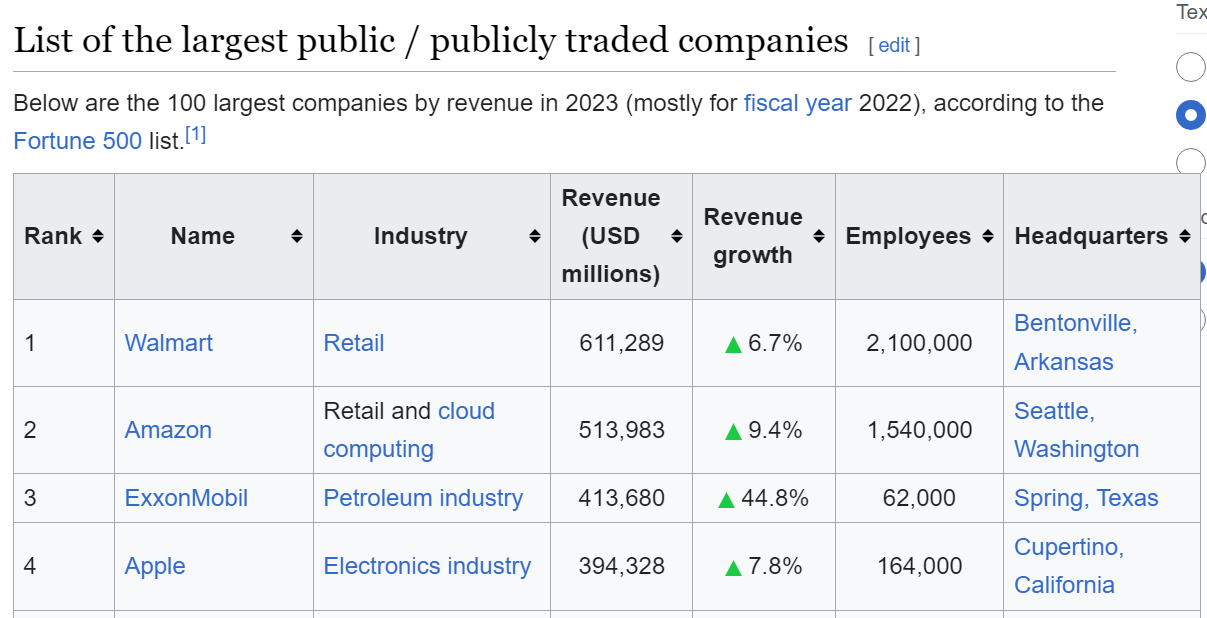

#### Import BeautifulSoup package and Requests function to obtain the text from the wikipedia website

In [ ]:
# Try to add one line and change the document to try commit function.

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html')

In [5]:
page

<Response [200]>

In [6]:
# print(soup.prettify()) - Not execute print command to save the space due to large amount of information under soup

Apply find_all function to extract information from the Table of Company List and the associated date. NOTE - After using **Inspect** function on the wiki website there are THREE tables on that page (the other two tables are the list of largest private companies right under the list of the public companies and the list of companies by profit). Thus, we just extract information from the first table of company list for the largest public companies and associated data.

In [7]:
table = soup.find_all('table')[1] ## Extract infromation from the First Table

In [8]:
# print(table) - Not execute print command to save the space due to large amount of information under table

The extracted information from the first table contains a large amount of contents and there are two key parameters - **'th'** contains all the title/column names and **'td'** contains all the data associated with these title/column names.

Extract Title/Column information, organize them and assign them to a pandas DataFrame df

In [9]:
world_titles = table.find_all('th')

In [10]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [11]:
world_table_titles = [title.text.strip() for title in world_titles] ## strip <th> and </th> texts 

In [12]:
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(columns = world_table_titles)

In [15]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


Extract all the data information (100 rows) associated with each column and assign them to the created DataFrame df

In [16]:
column_data = table.find_all('tr')

In [17]:
# column_data - Not execute this command to save the space due to large amount of information under column_data

In [18]:
for row in column_data[1:]: # Remove the very first row as it is an empty list
    row_data = row.find_all('td') # Assign all column data to variable row_data
    individual_row_data = [data.text.strip() for data in row_data] # Extract the column data row by row and assign to variable individual_row_data
    print(individual_row_data)
    length = len(df) 
    df.loc[length] = individual_row_data # Assign the column data to the DataFrame df row by row

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'Cencora', 'Pharmacy wholesale', '238

In [19]:
df # All the data in the Table of list for largest public companies have been extracted successfully from the Wikipedia website and are stored under the pandas DataFrame df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [21]:
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,39,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


#### Finally, save and export the data to an Excel csv file named 'Sample_data.csv'

In [22]:
df.to_csv(r'C:\Users\ylou\MLC-Spring 2024\MLC-Week13-Defining Keystone Project\Sample_data-Terry Lou.csv', index = False)